# KIAM8

## Task 1 - Data Analysis and Preprocessing

Objective: Prepare clean, feature-rich datasets ready for modeling by exploring the data, engineering meaningful features, and handling class imbalance.

In [3]:
"""
Exploratory Data Analysis for Fraud Data
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [4]:
# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [5]:
# load the Scripts path to Environment variable
import sys
import os

cwd = os.getcwd()
scripts_path = os.path.join(cwd, "..", "scripts")

absoulte_scripts_path = os.path.abspath(scripts_path)
if absoulte_scripts_path not in sys.path and os.path.isdir(scripts_path):
    sys.path.append(absoulte_scripts_path)
    print('Scripts Path Added to Environment Variable')
else:
    print('Scripts Path Already Exists in Environment Variable')

Scripts Path Added to Environment Variable


In [6]:
import data_loading as dl
import data_cleaning as dc

In [7]:
# Load Data
file_path ='../data/raw/Fraud_Data.csv'
df=dl.load_data(file_path)

DATA OVERVIEW
Shape: (151112, 11)

First few rows:
   user_id          signup_time        purchase_time  purchase_value  \
0    22058  2015-02-24 22:55:49  2015-04-18 02:47:11              34   
1   333320  2015-06-07 20:39:50  2015-06-08 01:38:54              16   
2     1359  2015-01-01 18:52:44  2015-01-01 18:52:45              15   
3   150084  2015-04-28 21:13:25  2015-05-04 13:54:50              44   
4   221365  2015-07-21 07:09:52  2015-09-09 18:40:53              39   

       device_id source browser sex  age    ip_address  class  
0  QVPSPJUOCKZAR    SEO  Chrome   M   39  7.327584e+08      0  
1  EOGFQPIZPYXFZ    Ads  Chrome   F   53  3.503114e+08      0  
2  YSSKYOSJHPPLJ    SEO   Opera   M   53  2.621474e+09      1  
3  ATGTXKYKUDUQN    SEO  Safari   M   41  3.840542e+09      0  
4  NAUITBZFJKHWW    Ads  Safari   M   45  4.155831e+08      0  

Data types:
user_id             int64
signup_time        object
purchase_time      object
purchase_value      int64
device_id      

In [8]:
# Clean Data
df_cleaned = dc.clean_fraud_data(df)

Starting fraud data cleaning...

Missing values before cleaning:
user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64

Missing values after cleaning:
user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64

Duplicates before: 0
Duplicates after: 0

Final shape: (151112, 11)

Cleaned data saved successfully!


# ========== UNIVARIATE ANALYSIS ==========

UNIVARIATE ANALYSIS


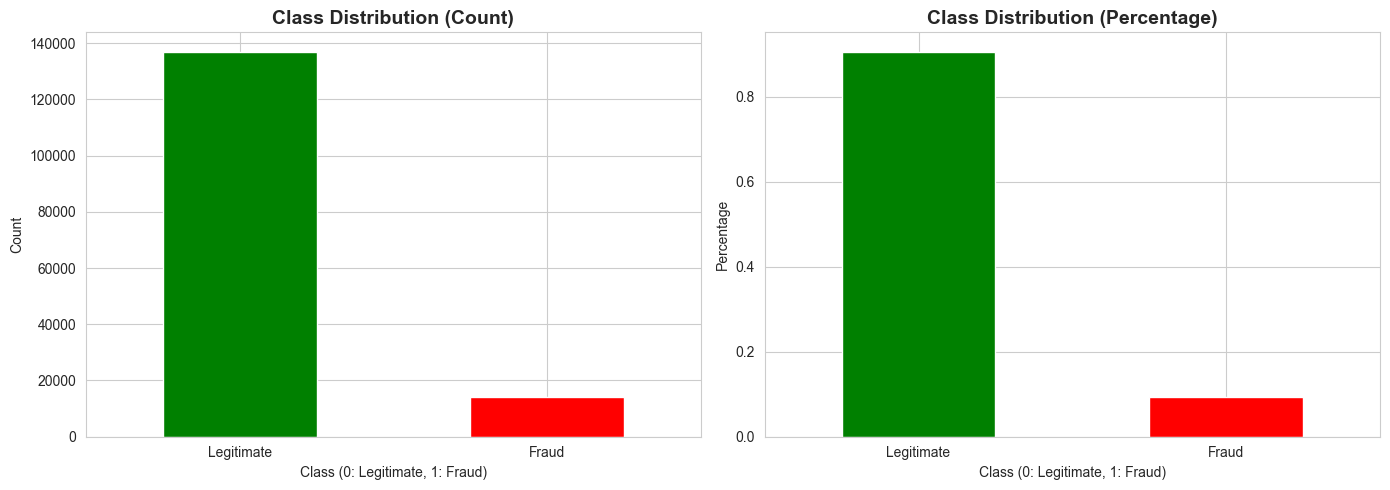

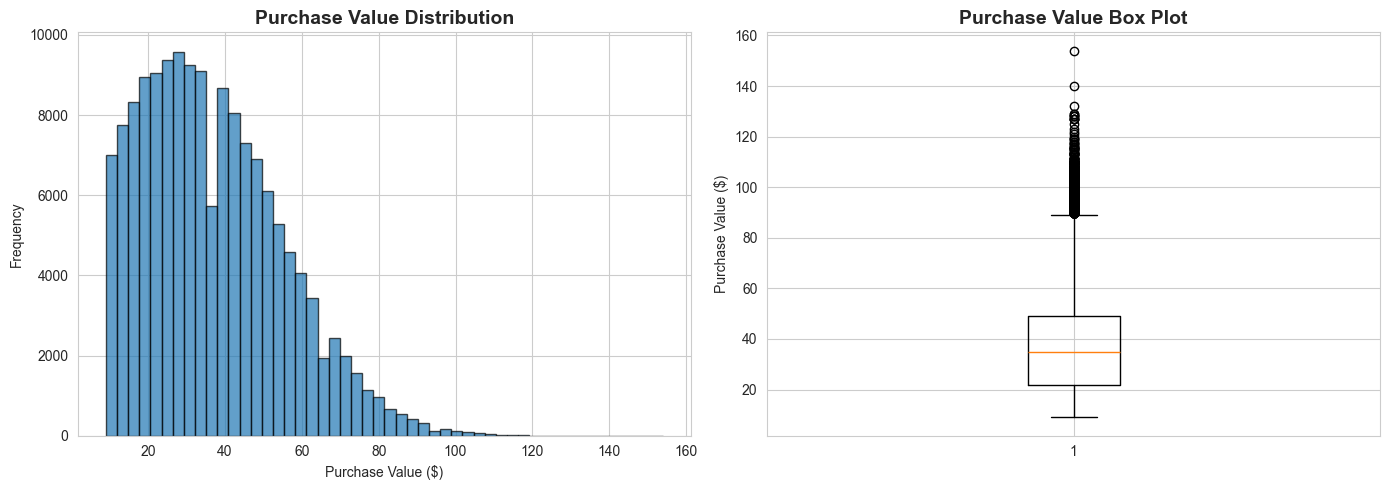


Purchase Value Statistics:
count    151112.000000
mean         36.935372
std          18.322762
min           9.000000
25%          22.000000
50%          35.000000
75%          49.000000
max         154.000000
Name: purchase_value, dtype: float64


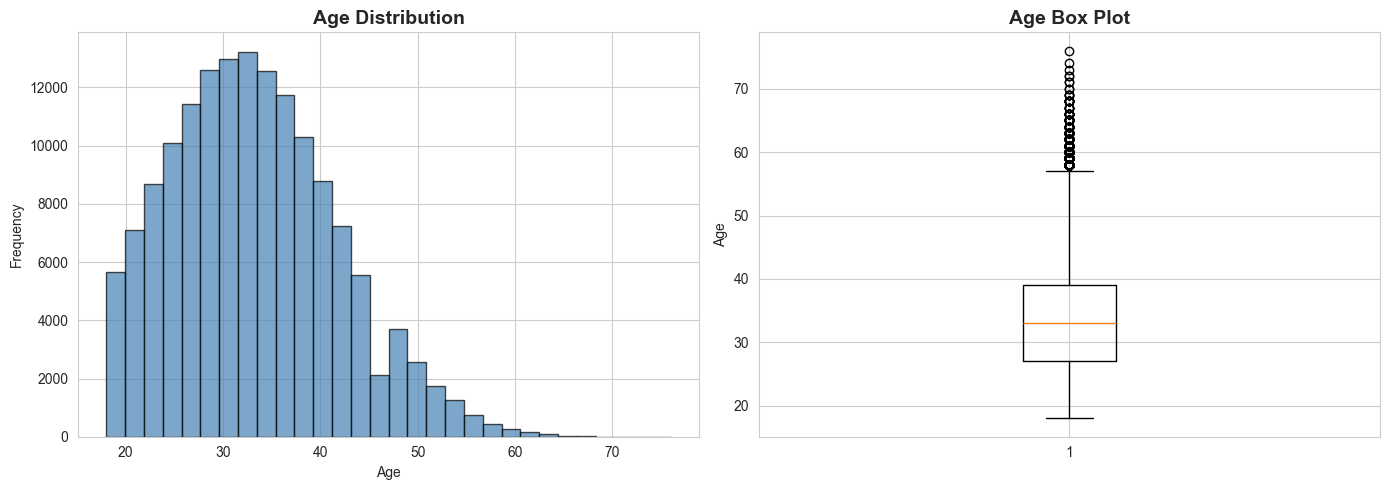

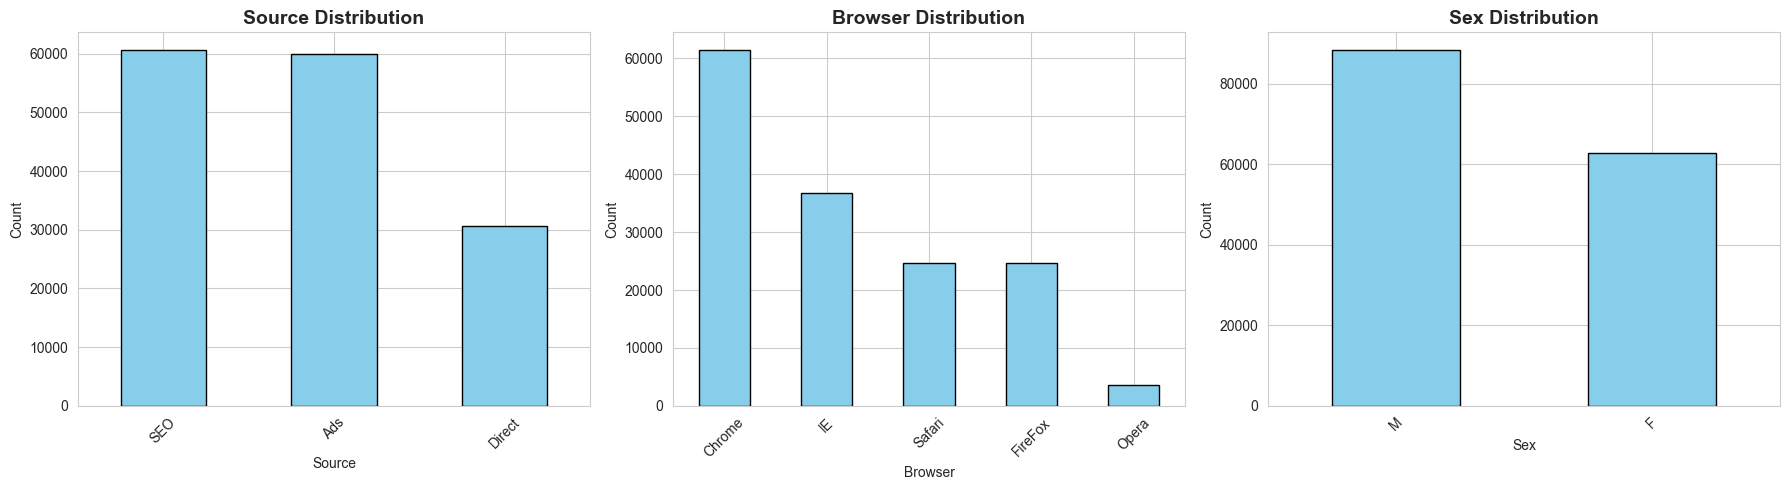


BIVARIATE ANALYSIS


C:\Users\henokt\AppData\Local\Temp\ipykernel_47328\732999474.py:100: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['Legitimate', 'Fraud'])


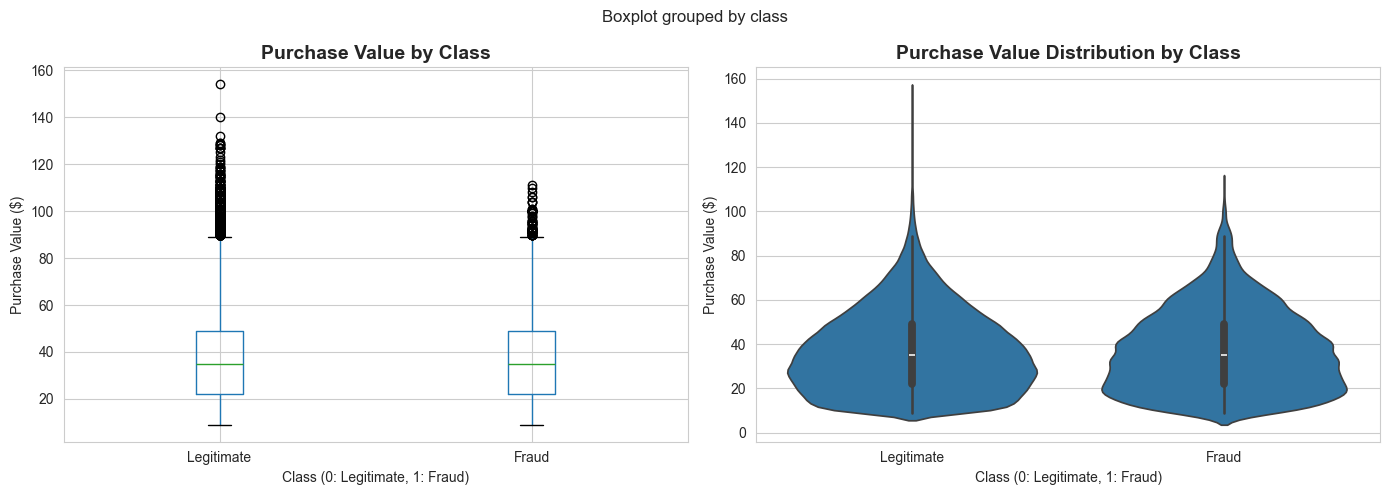


T-test for purchase_value by class:
T-statistic: -0.3930, P-value: 0.6943


C:\Users\henokt\AppData\Local\Temp\ipykernel_47328\732999474.py:119: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Legitimate', 'Fraud'])


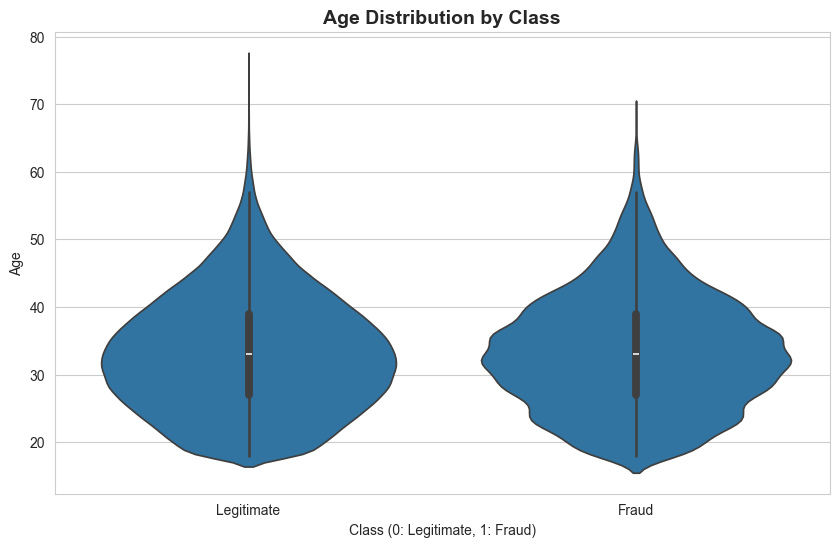

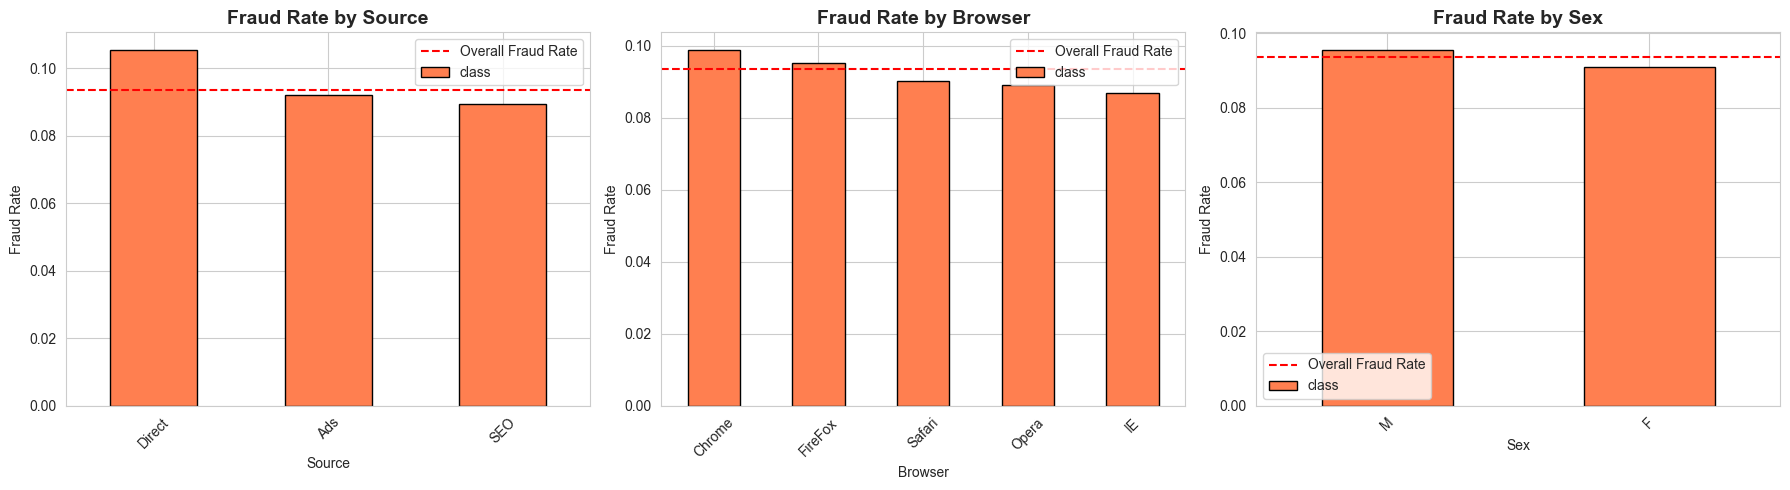

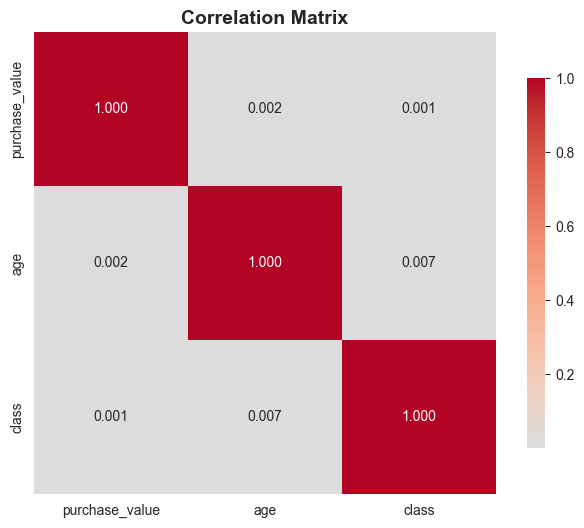


KEY INSIGHTS FROM EDA
1. Class Imbalance Ratio: 9.68:1
2. Mean Purchase Value (Legitimate): $36.93
3. Mean Purchase Value (Fraud): $36.99
4. Most Common Source: SEO
5. Most Common Browser: Chrome


In [13]:
# ========== UNIVARIATE ANALYSIS ==========
print("="*60)
print("UNIVARIATE ANALYSIS")
print("="*60)

# 1. Class Distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
df_cleaned['class'].value_counts().plot(kind='bar', ax=axes[0], color=['green', 'red'])
axes[0].set_title('Class Distribution (Count)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Class (0: Legitimate, 1: Fraud)')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(['Legitimate', 'Fraud'], rotation=0)

# Percentage plot
df_cleaned['class'].value_counts(normalize=True).plot(kind='bar', ax=axes[1], color=['green', 'red'])
axes[1].set_title('Class Distribution (Percentage)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Class (0: Legitimate, 1: Fraud)')
axes[1].set_ylabel('Percentage')
axes[1].set_xticklabels(['Legitimate', 'Fraud'], rotation=0)

plt.tight_layout()
plt.savefig('figures/class_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# 2. Purchase Value Distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df_cleaned['purchase_value'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_title('Purchase Value Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Purchase Value ($)')
axes[0].set_ylabel('Frequency')

# Box plot
axes[1].boxplot(df_cleaned['purchase_value'])
axes[1].set_title('Purchase Value Box Plot', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Purchase Value ($)')

plt.tight_layout()
plt.savefig('figures/purchase_value_dist.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nPurchase Value Statistics:\n{df_cleaned['purchase_value'].describe()}")

# 3. Age Distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(df_cleaned['age'], bins=30, edgecolor='black', alpha=0.7, color='steelblue')
axes[0].set_title('Age Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

axes[1].boxplot(df_cleaned['age'])
axes[1].set_title('Age Box Plot', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Age')

plt.tight_layout()
plt.savefig('figures/age_dist.png', dpi=300, bbox_inches='tight')
plt.show()

# 4. Categorical Variables
categorical_cols = ['source', 'browser', 'sex']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, col in enumerate(categorical_cols):
    df_cleaned[col].value_counts().plot(kind='bar', ax=axes[idx], color='skyblue', edgecolor='black')
    axes[idx].set_title(f'{col.capitalize()} Distribution', fontsize=14, fontweight='bold')
    axes[idx].set_xlabel(col.capitalize())
    axes[idx].set_ylabel('Count')
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('figures/categorical_dist.png', dpi=300, bbox_inches='tight')
plt.show()

# ========== BIVARIATE ANALYSIS ==========
print("\n" + "="*60)
print("BIVARIATE ANALYSIS")
print("="*60)

# 1. Purchase Value by Class
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Box plot
df_cleaned.boxplot(column='purchase_value', by='class', ax=axes[0])
axes[0].set_title('Purchase Value by Class', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Class (0: Legitimate, 1: Fraud)')
axes[0].set_ylabel('Purchase Value ($)')
plt.sca(axes[0])
plt.xticks([1, 2], ['Legitimate', 'Fraud'])

# Violin plot
sns.violinplot(x='class', y='purchase_value', data=df_cleaned, ax=axes[1])
axes[1].set_title('Purchase Value Distribution by Class', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Class (0: Legitimate, 1: Fraud)')
axes[1].set_ylabel('Purchase Value ($)')
axes[1].set_xticklabels(['Legitimate', 'Fraud'])

plt.tight_layout()
plt.savefig('figures/purchase_value_by_class.png', dpi=300, bbox_inches='tight')
plt.show()

# Statistical test
legit = df_cleaned[df_cleaned['class'] == 0]['purchase_value']
fraud = df_cleaned[df_cleaned['class'] == 1]['purchase_value']
t_stat, p_value = stats.ttest_ind(legit, fraud)
print(f"\nT-test for purchase_value by class:")
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")

# 2. Age by Class
fig, ax = plt.subplots(figsize=(10, 6))
sns.violinplot(x='class', y='age', data=df_cleaned, ax=ax)
ax.set_title('Age Distribution by Class', fontsize=14, fontweight='bold')
ax.set_xlabel('Class (0: Legitimate, 1: Fraud)')
ax.set_ylabel('Age')
ax.set_xticklabels(['Legitimate', 'Fraud'])
plt.savefig('figures/age_by_class.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. Fraud Rate by Categorical Variables
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, col in enumerate(categorical_cols):
    fraud_rate = df_cleaned.groupby(col)['class'].mean().sort_values(ascending=False)
    fraud_rate.plot(kind='bar', ax=axes[idx], color='coral', edgecolor='black')
    axes[idx].set_title(f'Fraud Rate by {col.capitalize()}', fontsize=14, fontweight='bold')
    axes[idx].set_xlabel(col.capitalize())
    axes[idx].set_ylabel('Fraud Rate')
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].axhline(y=df_cleaned['class'].mean(), color='red', linestyle='--', label='Overall Fraud Rate')
    axes[idx].legend()

plt.tight_layout()
plt.savefig('figures/fraud_rate_categorical.png', dpi=300, bbox_inches='tight')
plt.show()

# 4. Correlation Analysis for Numerical Features
numerical_cols = ['purchase_value', 'age', 'class']
correlation_matrix = df_cleaned[numerical_cols].corr()

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm', 
            center=0, square=True, ax=ax, cbar_kws={"shrink": 0.8})
ax.set_title('Correlation Matrix', fontsize=14, fontweight='bold')
plt.savefig('figures/correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n" + "="*60)
print("KEY INSIGHTS FROM EDA")
print("="*60)
print(f"1. Class Imbalance Ratio: {df_cleaned['class'].value_counts()[0] / df_cleaned['class'].value_counts()[1]:.2f}:1")
print(f"2. Mean Purchase Value (Legitimate): ${legit.mean():.2f}")
print(f"3. Mean Purchase Value (Fraud): ${fraud.mean():.2f}")
print(f"4. Most Common Source: {df_cleaned['source'].mode()[0]}")
print(f"5. Most Common Browser: {df_cleaned['browser'].mode()[0]}")

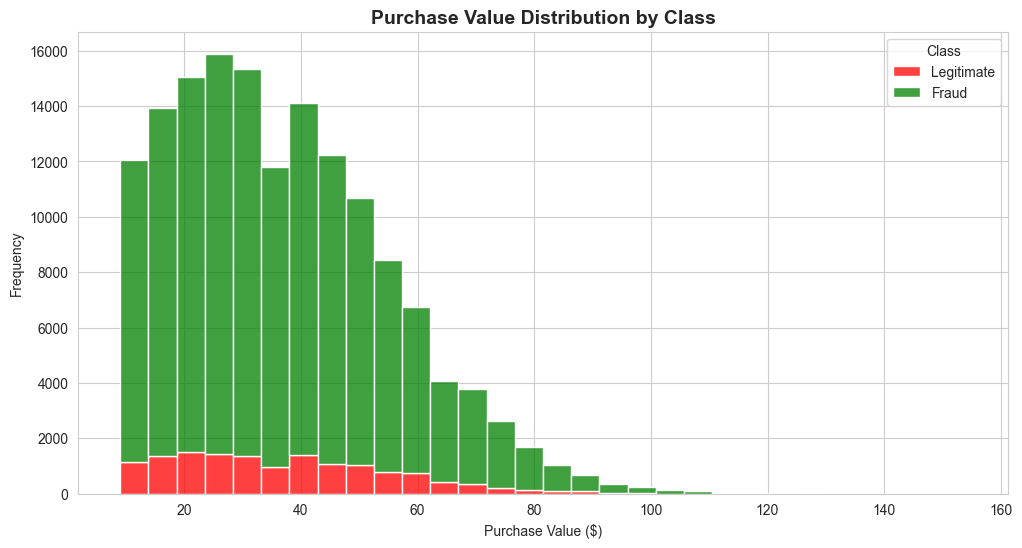

In [ ]:
# Visualize Purchase Value Distribution by Class

sns.histplot(data=df_cleaned, x='purchase_value', hue='class', multiple='stack', bins=30, palette={0: 'green', 1: 'red'})
plt.title('Purchase Value Distribution by Class', fontsize=14, fontweight='bold')
plt.legend(title='Class', labels=['Legitimate', 'Fraud'])
plt.xlabel('Purchase Value ($)')
plt.ylabel('Frequency') 
plt.savefig('figures/Purchase Value Distribution by Class.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Geo Location Integration

# Import the IP Address to Country Data

ip_country_file = '../data/raw/IpAddress_to_Country.csv'
ip_df=dl.load_data(ip_country_file)

In [ ]:
ip_df.columns

In [ ]:
# Convert IP addresses to numeric format for merging

def ip_to_numeric(ip):
    num = np.int64(ip)
    return num

In [ ]:
# Apply the conversion function

ip_df['lower_bound_ip_address'] = ip_df['lower_bound_ip_address'].apply(ip_to_numeric)
ip_df['upper_bound_ip_address'] = ip_df['upper_bound_ip_address'].apply(ip_to_numeric)

In [ ]:
# Examine the updated DataFrame
ip_df.head()

In [ ]:
# Write a function to map the IP addresses on the FraudDF to countries names

def map_ip_to_country(ip_address):
    # Find the corresponding country in the ip_df DataFrame
    country_info = ip_df[(ip_df['lower_bound_ip_address'] <= ip_address) & (ip_address <= ip_df['upper_bound_ip_address'])]
    if not country_info.empty:
        return country_info.iloc[0]['country']
    else:
        return "Unknown"

In [ ]:
# Map IP addresses to countries in the main DataFrame

df_cleaned['Country']= df_cleaned['ip_address'].apply(map_ip_to_country)

In [ ]:
# Examine the updated DataFrame
df_cleaned.head()

In [ ]:
# Save the enriched DataFrame
df_cleaned.to_csv('../data/processed/Fraud_Data_Enriched.csv', index=False)

In [ ]:
# ========== ADDITIONAL VISUALIZATION ==========

# Anallye fradud patterns by country

# Count fraud cases by country

df_cleaned.groupby('Country')['class'].sum().sort_values(ascending=False).head(10).plot.bar(color='purple', edgecolor='black')
plt.title('Top 10 Countries by Fraud Cases', fontsize=14, fontweight='bold')
plt.xlabel('Country')
plt.ylabel('Number of Fraud Cases')
plt.savefig('figures/top_countries_fraud.png', dpi=300, bbox_inches='tight')
plt.show()